In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 런타임 다시시작

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [4]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

### 제약업종 수집하기

In [5]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"

In [6]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [7]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
raw = raw.dropna(how="all").dropna(axis=1, how="all")
raw.shape
# 3개의 row, 3개의 column이 제거되었습니다.

(137, 12)


(134, 10)

In [8]:
raw

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,덕산테코피아 *,테마 편입 사유,20750.0,3580.0,+20.85%,20550.0,20600.0,2608997.0,52880.0,102828.0
2,에코프로비엠 *,테마 편입 사유,324500.0,44500.0,+15.89%,315500.0,316000.0,5384933.0,1759120.0,2131345.0
3,솔브레인홀딩스 *,테마 편입 사유,42200.0,5700.0,+15.62%,42350.0,42400.0,1045312.0,43983.0,110076.0
4,SK아이이테크놀로지,테마 편입 사유,76600.0,7900.0,+11.50%,76400.0,76500.0,694317.0,52492.0,111516.0
5,KG케미칼,테마 편입 사유,7420.0,730.0,+10.91%,7430.0,7440.0,10650060.0,81141.0,442364.0
...,...,...,...,...,...,...,...,...,...,...
130,디이엔티 *,테마 편입 사유,16550.0,1030.0,-5.86%,16510.0,16520.0,306516.0,5134.0,198872.0
131,에스코넥 *,테마 편입 사유,2135.0,185.0,-7.97%,2125.0,2130.0,4946328.0,10923.0,7254452.0
132,에코프로 *,테마 편입 사유,666000.0,58000.0,-8.01%,668000.0,669000.0,1393463.0,949841.0,336986.0
133,메가터치 *,테마 편입 사유,6000.0,600.0,-9.09%,5990.0,6000.0,2142544.0,13346.0,5904067.0


## 파생변수 만들기

In [9]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2023-12-04'

In [10]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [11]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,덕산테코피아 *,테마 편입 사유,20750.0,3580.0,+20.85%,20550.0,20600.0,2608997.0,52880.0,102828.0,2023-12-04
2,에코프로비엠 *,테마 편입 사유,324500.0,44500.0,+15.89%,315500.0,316000.0,5384933.0,1759120.0,2131345.0,2023-12-04
3,솔브레인홀딩스 *,테마 편입 사유,42200.0,5700.0,+15.62%,42350.0,42400.0,1045312.0,43983.0,110076.0,2023-12-04
4,SK아이이테크놀로지,테마 편입 사유,76600.0,7900.0,+11.50%,76400.0,76500.0,694317.0,52492.0,111516.0,2023-12-04
5,KG케미칼,테마 편입 사유,7420.0,730.0,+10.91%,7430.0,7440.0,10650060.0,81141.0,442364.0,2023-12-04


## 거래량과 거래대금 시각화

<Axes: ylabel='종목명'>

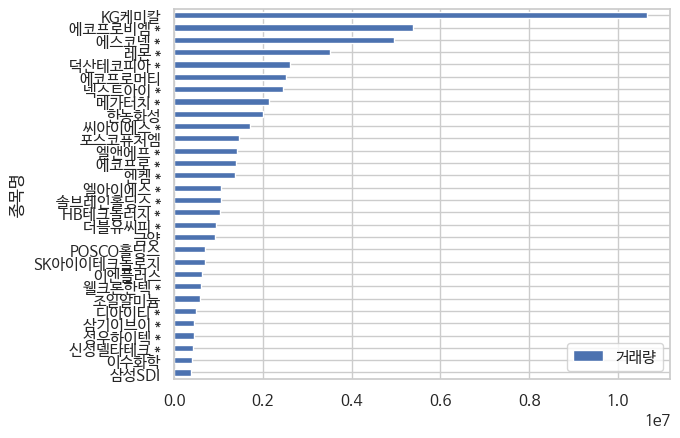

In [12]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

<Axes: ylabel='종목명'>

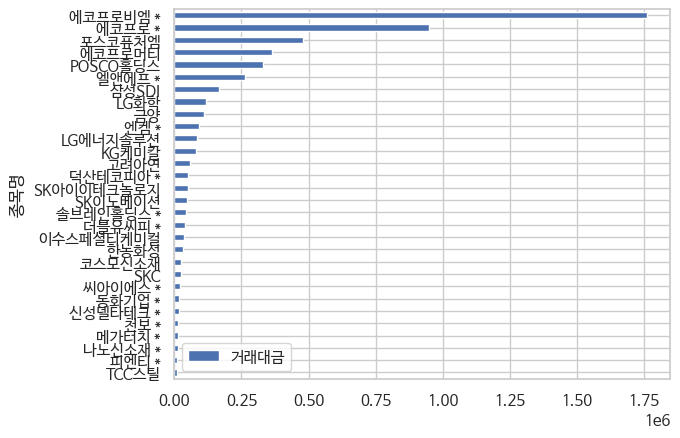

In [13]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [14]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

<ipython-input-14-ef6f61027c1d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")


In [15]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,덕산테코피아 *,덕산테코피아
2,에코프로비엠 *,에코프로비엠
3,솔브레인홀딩스 *,솔브레인홀딩스
4,SK아이이테크놀로지,SK아이이테크놀로지
5,KG케미칼,KG케미칼


In [22]:
!pip install -U finance-datareader

In [23]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX-DESC")
df_krx.head()

,Code,Name,Market,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,3S,KOSDAQ,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,105190,ACE 200,KOSPI,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,332500,ACE 200TR,KOSPI,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,448870,ACE 23-12 회사채(AA-이상)액티브,KOSPI,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,448880,ACE 24-12 회사채(AA-이상)액티브,KOSPI,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [24]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[["Code", "Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,105190,ACE 200
2,332500,ACE 200TR
3,448870,ACE 23-12 회사채(AA-이상)액티브
4,448880,ACE 24-12 회사채(AA-이상)액티브


In [25]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(134, 12)

In [26]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df
df = raw.merge(df_item_code_name, on="종목명_전처리", how='left')
df.shape

(134, 13)

In [27]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,덕산테코피아 *,테마 편입 사유,20750.0,3580.0,+20.85%,20550.0,20600.0,2608997.0,52880.0,102828.0,2023-12-04,덕산테코피아,317330
1,에코프로비엠 *,테마 편입 사유,324500.0,44500.0,+15.89%,315500.0,316000.0,5384933.0,1759120.0,2131345.0,2023-12-04,에코프로비엠,247540
2,솔브레인홀딩스 *,테마 편입 사유,42200.0,5700.0,+15.62%,42350.0,42400.0,1045312.0,43983.0,110076.0,2023-12-04,솔브레인홀딩스,036830
3,SK아이이테크놀로지,테마 편입 사유,76600.0,7900.0,+11.50%,76400.0,76500.0,694317.0,52492.0,111516.0,2023-12-04,SK아이이테크놀로지,361610
4,KG케미칼,테마 편입 사유,7420.0,730.0,+10.91%,7430.0,7440.0,10650060.0,81141.0,442364.0,2023-12-04,KG케미칼,001390


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [28]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [29]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=068270'

In [30]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [31]:
# 제대로 수집이 되었는지 확인합니다.
tables[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2023.12(E)
,주요재무정보,IFRS연결
0,매출액,6395.00
1,영업이익,2130.00
2,당기순이익,1651.00
3,영업이익률,33.31
4,순이익률,25.82
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [32]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.09),추정PERlEPS,PBRlBPS (2023.09),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,146402770,29849794,20.39%,"4.00매수 l 215,000","184,100 l 131,000","39.46배 l 4,126원","34.00배 l 4,753원","5.30배 l 30,691원",0.22%,106.34배,+0.44%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [33]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [34]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [35]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [36]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0         1
 0         매출액   6395.00
 1        영업이익   2130.00
 2       당기순이익   1651.00
 3       영업이익률     33.31
 4        순이익률     25.82
 5   ROE(지배주주)       NaN
 6        부채비율       NaN
 7        당좌비율       NaN
 8         유보율       NaN
 9      EPS(원)   1041.00
 10     PER(배)    156.68
 11     BPS(원)  34336.00
 12     PBR(배)      4.75
 13   주당배당금(원)       NaN
 14   시가배당률(%)       NaN
 15    배당성향(%)       NaN,
           0               1
 0      시가총액  23조  8,344  억원
 1    시가총액순위         코스피 13위
 2     상장주식수       146402770
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  146402770
 1  외국인보유주식수(B)   29849794
 2  외국인소진율(B/A)     20.39%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  215,000
 1   52주최고l최저  184,100  l  131,000,
                    0                  1
 0   PERlEPS(2023.09)  39.46배  l  4,126원
 1          추정PERlEPS  34.00배  l  4,753원
 2  PBRlBPS (2023.09)  5.30배  l  30,691원
 3      배당수익률l2022.12              0.22%,
       

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [37]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),146402770
1,외국인보유주식수(B),29849794
2,외국인소진율(B/A),20.39%


In [38]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,6395.0
1,영업이익,2130.0
2,당기순이익,1651.0
3,영업이익률,33.31
4,순이익률,25.82
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1041.0


## transpose를 통해 행과 열의 위치를 변경

In [39]:
df_item.set_index(0)

,1
0,
매출액,6395.0
영업이익,2130.0
당기순이익,1651.0
영업이익률,33.31
순이익률,25.82
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [40]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.09),추정PERlEPS,PBRlBPS (2023.09),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,6395.0,2130.0,1651.0,33.31,25.82,NaN,NaN,NaN,NaN,1041.0,...,29849794,20.39%,"4.00매수 l 215,000","184,100 l 131,000","39.46배 l 4,126원","34.00배 l 4,753원","5.30배 l 30,691원",0.22%,106.34배,+0.44%


## 개별 주가 정보를 수집하는 함수를 생성

In [41]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다.
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):

    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")

    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)

    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)

    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [42]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.09),추정PERlEPS,PBRlBPS (2023.09),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,6395.0,2130.0,1651.0,33.31,25.82,NaN,NaN,NaN,NaN,1041.0,...,29849794,20.39%,"4.00매수 l 215,000","184,100 l 131,000","39.43배 l 4,126원","34.00배 l 4,753원","5.30배 l 30,691원",0.22%,106.34배,+0.42%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [43]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [44]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/134 [00:00<?, ?it/s]

In [45]:
result

0      0    매출액  영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부채비...
1      0      매출액   영업이익  당기순이익 영업이익률  순이익률 ROE(지배주주)...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0     매출액  영업이익  당기순이익 영업이익률  순이익률 ROE(지배주주) 부...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
129    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
130    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
131    0      매출액   영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부...
132    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
133    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 134, dtype: object

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [46]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

In [47]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,PBRlBPS (2023.09),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS,PBRlBPS,종목코드
0,215.0,-34.0,NaN,-15.97,NaN,NaN,NaN,NaN,NaN,-141.0,...,"2.09배 l 9,940원",NaN,-147.62배,-0.36%,NaN,NaN,NaN,NaN,NaN,317330
1,17716.0,648.0,405.0,3.66,2.29,NaN,NaN,NaN,NaN,395.0,...,"21.09배 l 15,292원",NaN,43.96배,+3.29%,0.14%,NaN,NaN,NaN,NaN,247540
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0.69배 l 60,546원",NaN,43.96배,+3.29%,0.41%,NaN,NaN,NaN,NaN,036830
3,1976.0,97.0,195.0,4.93,9.88,NaN,NaN,NaN,NaN,198.0,...,"2.42배 l 31,800원",NaN,43.96배,+3.29%,NaN,NaN,NaN,NaN,NaN,361610
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0.57배 l 12,937원",NaN,17.39배,-0.42%,1.35%,NaN,NaN,NaN,NaN,001390


In [48]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(134, 13)

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [49]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,덕산테코피아 *,테마 편입 사유,20750.0,3580.0,+20.85%,20550.0,20600.0,2608997.0,52880.0,102828.0,2023-12-04,덕산테코피아,317330
1,에코프로비엠 *,테마 편입 사유,324500.0,44500.0,+15.89%,315500.0,316000.0,5384933.0,1759120.0,2131345.0,2023-12-04,에코프로비엠,247540
2,솔브레인홀딩스 *,테마 편입 사유,42200.0,5700.0,+15.62%,42350.0,42400.0,1045312.0,43983.0,110076.0,2023-12-04,솔브레인홀딩스,036830
3,SK아이이테크놀로지,테마 편입 사유,76600.0,7900.0,+11.50%,76400.0,76500.0,694317.0,52492.0,111516.0,2023-12-04,SK아이이테크놀로지,361610
4,KG케미칼,테마 편입 사유,7420.0,730.0,+10.91%,7430.0,7440.0,10650060.0,81141.0,442364.0,2023-12-04,KG케미칼,001390


In [50]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [51]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((134, 13), (134, 37), (134, 49))

In [52]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,추정PERlEPS,PBRlBPS (2023.09),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS,PBRlBPS
0,덕산테코피아 *,테마 편입 사유,20750.0,3580.0,+20.85%,20550.0,20600.0,2608997.0,52880.0,102828.0,...,N/A l N/A,"2.09배 l 9,940원",NaN,-147.62배,-0.36%,NaN,NaN,NaN,NaN,NaN
1,에코프로비엠 *,테마 편입 사유,324500.0,44500.0,+15.89%,315500.0,316000.0,5384933.0,1759120.0,2131345.0,...,"169.00배 l 1,904원","21.09배 l 15,292원",NaN,43.96배,+3.29%,0.14%,NaN,NaN,NaN,NaN
2,솔브레인홀딩스 *,테마 편입 사유,42200.0,5700.0,+15.62%,42350.0,42400.0,1045312.0,43983.0,110076.0,...,N/A l N/A,"0.69배 l 60,546원",NaN,43.96배,+3.29%,0.41%,NaN,NaN,NaN,NaN
3,SK아이이테크놀로지,테마 편입 사유,76600.0,7900.0,+11.50%,76400.0,76500.0,694317.0,52492.0,111516.0,...,174.00배 l 441원,"2.42배 l 31,800원",NaN,43.96배,+3.29%,NaN,NaN,NaN,NaN,NaN
4,KG케미칼,테마 편입 사유,7420.0,730.0,+10.91%,7430.0,7440.0,10650060.0,81141.0,442364.0,...,N/A l N/A,"0.57배 l 12,937원",NaN,17.39배,-0.42%,1.35%,NaN,NaN,NaN,NaN


## 파일명 만들기

In [53]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name

file_name_1 = url.split("=")[1].replace("&", "_")
file_name_2 = url.split("=")[2]
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'theme_no_64_2023-12-04.csv'

In [54]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [55]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,추정PERlEPS,PBRlBPS (2023.09),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS,PBRlBPS
0,덕산테코피아 *,테마 편입 사유,20750.0,3580.0,+20.85%,20550.0,20600.0,2608997.0,52880.0,102828.0,...,N/A l N/A,"2.09배 l 9,940원",NaN,-147.62배,-0.36%,NaN,NaN,NaN,NaN,NaN
1,에코프로비엠 *,테마 편입 사유,324500.0,44500.0,+15.89%,315500.0,316000.0,5384933.0,1759120.0,2131345.0,...,"169.00배 l 1,904원","21.09배 l 15,292원",NaN,43.96배,+3.29%,0.14%,NaN,NaN,NaN,NaN
2,솔브레인홀딩스 *,테마 편입 사유,42200.0,5700.0,+15.62%,42350.0,42400.0,1045312.0,43983.0,110076.0,...,N/A l N/A,"0.69배 l 60,546원",NaN,43.96배,+3.29%,0.41%,NaN,NaN,NaN,NaN
3,SK아이이테크놀로지,테마 편입 사유,76600.0,7900.0,+11.50%,76400.0,76500.0,694317.0,52492.0,111516.0,...,174.00배 l 441원,"2.42배 l 31,800원",NaN,43.96배,+3.29%,NaN,NaN,NaN,NaN,NaN
4,KG케미칼,테마 편입 사유,7420.0,730.0,+10.91%,7430.0,7440.0,10650060.0,81141.0,442364.0,...,N/A l N/A,"0.57배 l 12,937원",NaN,17.39배,-0.42%,1.35%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,디이엔티 *,테마 편입 사유,16550.0,1030.0,-5.86%,16510.0,16520.0,306516.0,5134.0,198872.0,...,N/A l N/A,"2.51배 l 6,571원",NaN,-147.62배,-0.33%,NaN,NaN,NaN,NaN,NaN
130,에스코넥 *,테마 편입 사유,2135.0,185.0,-7.97%,2125.0,2130.0,4946328.0,10923.0,7254452.0,...,N/A l N/A,2.20배 l 967원,NaN,40.42배,-0.66%,NaN,NaN,NaN,NaN,NaN
131,에코프로 *,테마 편입 사유,666000.0,58000.0,-8.01%,668000.0,669000.0,1393463.0,949841.0,336986.0,...,N/A l N/A,"12.57배 l 53,380원",NaN,38.73배,-0.42%,0.07%,NaN,NaN,NaN,NaN
132,메가터치 *,테마 편입 사유,6000.0,600.0,-9.09%,5990.0,6000.0,2142544.0,13346.0,5904067.0,...,N/A l N/A,NaN,NaN,33.40배,-0.43%,NaN,14.10배 l 427원,"3.69배 l 1,631원",NaN,NaN
